# DATASET SELECTION

The candidates were selected from *kaggle.com* website. All positions represent the email contents classified as either spam or "ham" (non-spam). Each one of them will be analysed in subsections below and the best one will be chosen in the summary at the end of this notebook.


## Helper functions

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def show_labels_ratio(dataset: pd.DataFrame, label_column: str) -> None:
    label_counts = dataset[label_column].value_counts()
    label_counts_ratio = label_counts / len(dataset) * 100

    ax = label_counts_ratio.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.xlabel('Prediction Label')
    plt.ylabel('Ratio (%)')
    plt.title('Ratio of Prediction Labels')
    plt.show()

## emails.csv

This dataset was posted in this [kaggle post](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv)

Total dataset size is 31.24 MB.


In [11]:
EMAIL_DATASET_PATH = '../data/emails.csv'

df_email = pd.read_csv(EMAIL_DATASET_PATH)
df_email.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


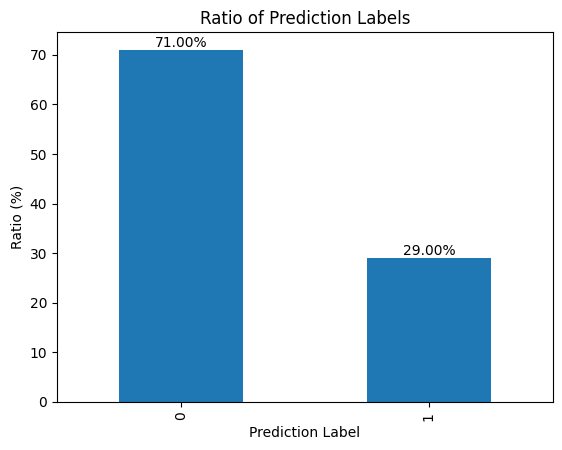

In [12]:
show_labels_ratio(df_email, 'Prediction')

## PROS:

- Good class balance
- Already normalized
- Biggest size

## Cons:
- Biggest size
- No access to unnormalized spam content

## spam_assasin.csv

This dataset was posted in this [kaggle post](https://www.kaggle.com/datasets/ganiyuolalekan/spam-assassin-email-classification-dataset)

Total size of the dataset is 24.53 MB

In [13]:
SPAM_ASSASIN_DATASET_PATH = '../data/spam_assassin.csv'

df_spam_assasin = pd.read_csv(SPAM_ASSASIN_DATASET_PATH)
df_spam_assasin.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


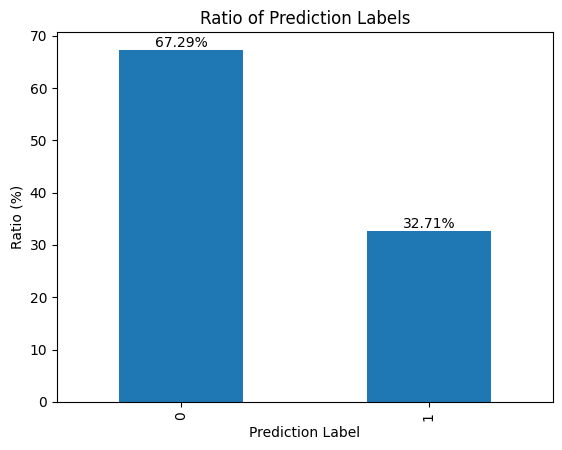

In [14]:
show_labels_ratio(df_spam_assasin, 'target')

## PROS:

- The best class balance
- Access to base email content
- Decent dataset size
- Access to snapshot of the email message (with html, the models can recognise more relations)

## Cons:
- Need to filter the email text for training (Very hard)

## spam.csv

This dataset was posted in this [kaggle post](https://www.kaggle.com/code/kshitij192/spam-email-classification-using-bert/input)

Total size of the dataset is 503.66 kB.

In [18]:
SPAM_DATASET_PATH = '../data/spam.csv'

df_spam = pd.read_csv(SPAM_DATASET_PATH)
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


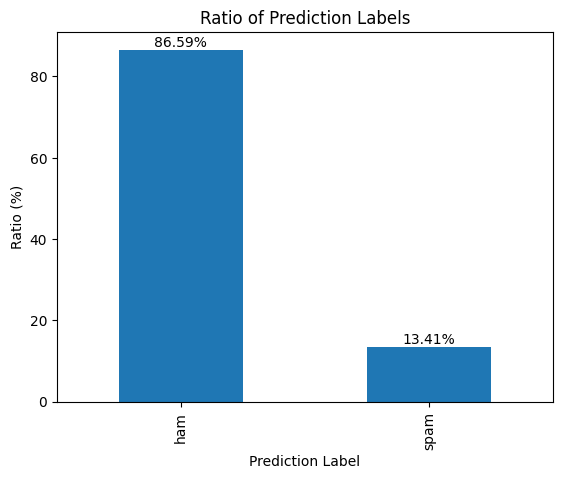

In [20]:
show_labels_ratio(df_spam, 'v1')

## PROS:
- Access to original email text

## Cons:
- Poor dataset size
- Poor class balance
- Need to filter the corrupted characters in dataset
- Unused columns

## spam_ham_dataset.csv

This dataset was posted in this [kaggle post](https://www.kaggle.com/datasets/venky73/spam-mails-dataset)

Total size of the dataset is 5.5 MB.

In [6]:
SPAM_HAM_DATASET_PATH = '../data/spam_ham_dataset.csv'

df_spam_ham = pd.read_csv(SPAM_HAM_DATASET_PATH)
df_spam_ham.head()

,id,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


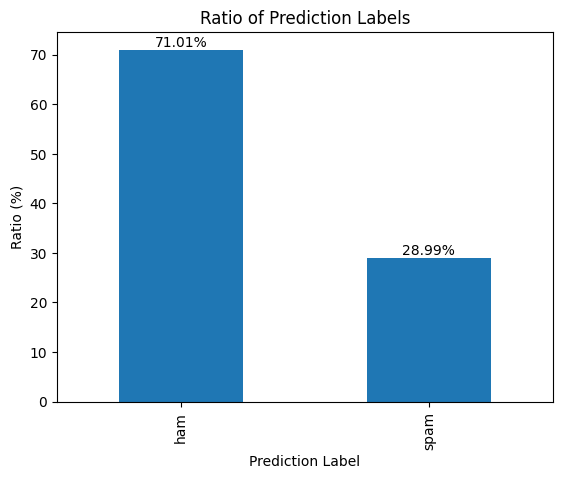

In [8]:
show_labels_ratio(df_spam_ham, 'label')

## PROS:
- Access to original email text
- Easy access to email's subject
- Well balanced (althrough still needs some more balancing)
- Decent dataset size

## Cons:
- Could be a little bigger

# SUMMARY

| Dataset Name | Size       | Percentage of spam class |
|--------------|------------|--------------------------|
| emails.csv   | 31.24 MB   |            29%           |
| spam_assasin.csv | 24.53 MB |          32.71%        |
| spam.csv     | 503.66 kB  |            13.41%        |
| spam_ham_dataset.csv | 5.5MB |         28.99%        |

# Selection

Out of the four of them, the *spam.csv* dataset seems the worst. It has the smallest size and the data is unnormalised - there are some non-udf characters which need to be filtered. The class balance is also the poorest so we can safely eliminate this candidate.
When it comes to the first dataset - *emails.csv* - the biggest advantage is already normalized data (which can also be a con - we don't have access to the original email text). The size is also the best and the class balance is decent.
The second dataset - *spam_assasin.csv* seems to be a promising candidate. The snapshot of email's html gives us access to the original email content which allows our models to find hidden relations in - for example - the headers or picture banners. The class
balance is also the best out of the three candidates, but it still needs to be balanced in training. However this dataset has a lot of useless information inside the email text column. Things like the sender email, IP address and date in combination with no structure allowing us to simply filter the contents 
sadly make this dataset unfitting for the problem. The last presented dataset - *spam_ham_dataset.csv* has a decent size, class balance and also gives us access to the email subject - which gives us additional data and gives the model another decisive point. Overall, the format of the data in combination with other aspects make this dataset the most fitting for 
the given problem.